# UE 11
## Ziele der Übung: Modell weiterentwickeln
- Residuallast berechnen
- Optimierungsmodell
    - mehr Zeitschritte
    - mehr Kraftwerke 
    - binäre Variable für den Kraftwerkseinsatz
    - Start-up costs
    - Speicher
- Ergebnisse plotten

## Bibliotheken einlesen
- numpy: "Numerical Python" 
- pandas: Package for Datahandling
- gurobipy: Package for linear optimization
- matplotlib.pyplot: Package for plotting Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import *

In [2]:
options = {
    "WLSACCESSID": "968327de-bce8-4d23-bdcd-f0fc20a5933d",
    "WLSSECRET": "1335c5ac-8dbb-42f0-aca8-8f1956c77e66",
    "LICENSEID": 2467020,
}

## 1. Residuallast berechnen
- Last und EE-Erzeugung aus .csv-Dateien einlesen
- in Dataframe speichern und Zeitstempel erstellen
- Residuallast berechnet (Last-EE) und in neuem Dataframe speichern
- Residuallast plotten

### Last

In [3]:
# Import csv
year = 2015
path_load = './Input/Load_'+str(year)+'.csv'
#path = './Input/Load_2015.csv'

# Read from csv



In [33]:
# Create column including date and time
df_load['Timestamp'] = df_load['Datum']+" "+df_load['Zeit']

# Create timestamp from column of 'datetime' format 
pd.to_datetime()

# Set the created timestamp column as an index

# Drop columns Datum and Zeit because we dont need them


,Wert in MW
Timestamp,
2015-01-01 00:00:00+00:00,1664
2015-01-01 00:15:00+00:00,2224
2015-01-01 00:30:00+00:00,2064
2015-01-01 00:45:00+00:00,2224
2015-01-01 01:00:00+00:00,2144


### EE-Erzeugung

In [34]:
# Import csv
year = 2015
path_EE = './Input/EE_gen_'+str(year)+'.csv'
# Read from csv


,cet_cest_timestamp,actual_Solar,actual_wind
35035,2015-12-31T23:45:00+0100,0.0,607.5
35036,2016-01-01T00:00:00+0100,0.0,600.9
35037,2016-01-01T00:15:00+0100,0.0,588.0
35038,2016-01-01T00:30:00+0100,0.0,579.0
35039,2016-01-01T00:45:00+0100,0.0,573.3


In [35]:
# Set datetime format
df_EE['cet_cest_timestamp'] = pd.to_datetime()
# Set index


,actual_Solar,actual_wind
cet_cest_timestamp,,
2015-01-01 00:00:00+00:00,0.0,683.4
2015-01-01 00:15:00+00:00,0.0,692.7
2015-01-01 00:30:00+00:00,0.0,692.4
2015-01-01 00:45:00+00:00,0.0,701.1
2015-01-01 01:00:00+00:00,0.0,711.3


### Residuallast

In [36]:
# Create new dataframe


df_res_load.head()

,Residuallast in MW
2015-01-01 00:00:00+00:00,980.6
2015-01-01 00:00:00+00:00,1492.6
2015-01-01 00:15:00+00:00,1531.3
2015-01-01 00:30:00+00:00,1371.6
2015-01-01 00:45:00+00:00,1522.9


### Auswahl einer Woche

In [37]:
# New dataframe
df_res_load_cropped = pd.DataFrame()

# Define week to be the 10th week of the year

# define a mask and apply to df_res_load with .loc[mask]


# Resample to hourly load


#df_res_load_cropped.head()

,Residuallast in MW
2015-03-02 00:00:00+00:00,859.350
2015-03-02 01:00:00+00:00,681.375
2015-03-02 02:00:00+00:00,544.850
2015-03-02 03:00:00+00:00,358.025
2015-03-02 04:00:00+00:00,334.075


### Residuallast plotten

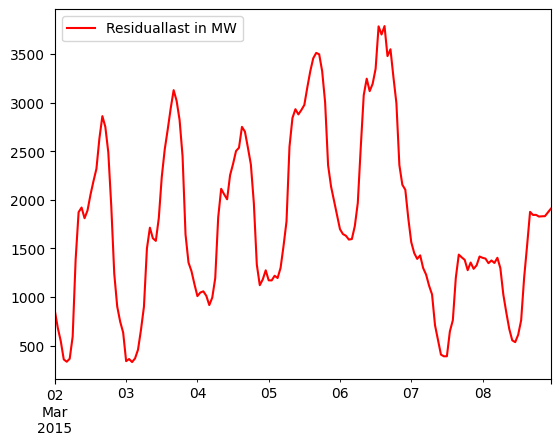

## 2. Modellierung
- Kraftwerksparameter aus .csv-Datei einlesen
- Modell aufstellen
    - Kraftwerksparameter definiern
    - Variablen definieren
    - Nebenbedingungen einfügen, die durch die Parameter der KW definiert werden
        - Maximale Leistung / Minimale Leistung
        - Emissionen / CO2-Kosten --> Kosten 0.02 €/kg, Limit 3.500.000.000.000.000 kg_CO2/MWh_el
        - Nachfrage
        - Start-Up Costs
        - Speicher
            - in t=0 leer
            - max. 200 MWh
    - Zielfunktion festlegen

### Kraftwerksparameter

In [39]:
# Define path
path_PP = './Input/PP_List.csv'
# read csv
df_PP = pd.read_csv(path_PP, sep=';', decimal=',')
df_PP

,Fuel,Pmax in MW,Pmin in MW,variable costs in EUR/MWh,startup cost in EUR,fix operating cost in EUR/h,Emissionsfaktor kg_CO2/MWh_el
0,Biomass,82,1.00,50,10,4600,0
1,Gas,1450,1.00,35,280,3800,455
2,Hard_Coal,1487,223.05,15,420,7000,891
3,Lignite,1320,264.00,6,420,7800,1225
4,Uranium,666,219.78,5,10000,11000,0
5,Oil,135,1.00,38,280,3800,776
6,Water,146,1.00,0,1,5000,0


### Modell erstellen

In [40]:
# Create Model
env = gurobipy.Env(params=options)
M = gurobipy.Model(name= 'Unit Commitment', env=env)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2467020
Academic license 2467020 - for non-commercial use only - registered to ve___@tu-berlin.de


### Parameter

In [41]:
# Load
load_model = 

# Power Plants
PP_model = df_PP.copy()

# Pmax
P_max = 

# Pmin
P_min =

# cost
cost_var = 
cost_su = 
cost_fix = 

# emissions
e_factor = 
e_cost = 0.02 # in EUR/kg
e_limit = 3500000000000000 # in kg CO2

# Storage
S_max =  # maximales Speichervolumen in MWh
S_0 =  #initialer Speicherstand in t=0 is 0

# Sets for Timesteps and Powerplants
T = 
I = 

### Variablen

In [43]:
# Production
X = M.addVars()

# Power Plant Status, 1 = operating, 0 = not operating

# Start-up Status, 1 = start-up, 0 = not start-up

# Emissions (define variable for easier use later on)

# Storage variables

              
              

### Nebenbedingungen
- Maximale und minimale Erzeugung
- Start-up Status
- Emissionen
- Speicher
    - Maximaler Speicherstand
    - Bilanz für t=0 (Level_0 = S_0 + S_in_0 - S_out_0)
    - Bilanz für jedes t > 0 (Level_t = Level_t-1 + S_in_t - S_out_t)
- Deckung der Nachfrage

In [44]:
# Erzeugung
# Pmax
M.addConstrs()
# Pmin
M.addConstrs()
M.update()

In [45]:
# Start-up
# t = 0 --> alle vorher aus
M.addConstrs()
# for t > 0
M.addConstrs()
M.update()

In [46]:
# Emission
M.addConstrs()
# Limit
M.addConstr()
M.update()

In [47]:
# Speicher
# S_max
M.addConstrs()
# t=0
M.addConstr()
# Bilanz t>0
M.addConstrs()
M.update()

In [48]:
# Load
M.addConstrs()
M.update()

### Zielfunktion

In [49]:
M.setObjective()

### Optimierung

In [60]:
M.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel Core Processor (Haswell, no TSX), instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2467020 - for non-commercial use only - registered to ve___@tu-berlin.de
Optimize a model with 5209 rows, 5208 columns and 13600 nonzeros
Model fingerprint: 0x997ad437
Variable types: 2856 continuous, 2352 integer (2352 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [2e-02, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+02, 4e+15]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolved: 3353 rows, 3520 columns, 9137 nonzeros

Continuing optimization...


Cutting planes:
  Learned: 12
  Gomory: 9
  Cover: 27
  Implied bound: 4
  MIR: 49
  Flow cover: 66
  Zero half: 1
  Network: 1
  RLT: 4
  Relax-and-lift: 7

Explored 1 nodes (5912 simple

In [52]:
print(M.objVal)
M.printAttr('X')

9603607.434750002

    Variable            X 
-------------------------
Production of PP i in timestep t[0,1]       62.725 
Production of PP i in timestep t[0,4]          666 
Production of PP i in timestep t[0,6]          146 
Production of PP i in timestep t[1,4]          666 
Production of PP i in timestep t[2,4]          666 
Production of PP i in timestep t[3,4]      436.875 
Production of PP i in timestep t[4,4]      334.075 
Production of PP i in timestep t[5,4]      365.012 
Production of PP i in timestep t[6,4]      592.475 
Production of PP i in timestep t[7,3]      720.812 
Production of PP i in timestep t[7,4]          666 
Production of PP i in timestep t[8,3]      1007.75 
Production of PP i in timestep t[8,4]          666 
Production of PP i in timestep t[9,3]      1255.61 
Production of PP i in timestep t[9,4]          666 
Production of PP i in timestep t[10,3]      1251.03 
Production of PP i in timestep t[10,4]          666 
Production of PP i in timestep t[11,3]    

### Ergebnisse: Produktion

In [53]:
# Save production to matrix
matrix= []
for t in T:
    array = []
    for i in I:
        array.append(X[t,i].X)
    matrix.append(array)
# Convert matrix to Dataframe
Production = pd.DataFrame(matrix)
# Rename columns
Production.columns = ['Biomasse', 'Gas', 'Steinkohle', 'Braunkohle', 'Uran', 'Öl', 'Wasser']
# Set index to timestamp
Production.set_index(df_res_load_cropped.index, inplace=True)

Production.tail()

,Biomasse,Gas,Steinkohle,Braunkohle,Uran,Öl,Wasser
2015-03-08 19:00:00+00:00,0.0,0.0,0.0,1320.000,666.0,0.0,0.0
2015-03-08 20:00:00+00:00,0.0,0.0,0.0,1011.750,666.0,0.0,0.0
2015-03-08 21:00:00+00:00,0.0,0.0,0.0,1320.000,666.0,0.0,0.0
2015-03-08 22:00:00+00:00,0.0,0.0,0.0,1204.075,666.0,0.0,0.0
2015-03-08 23:00:00+00:00,0.0,0.0,0.0,1043.150,666.0,0.0,0.0


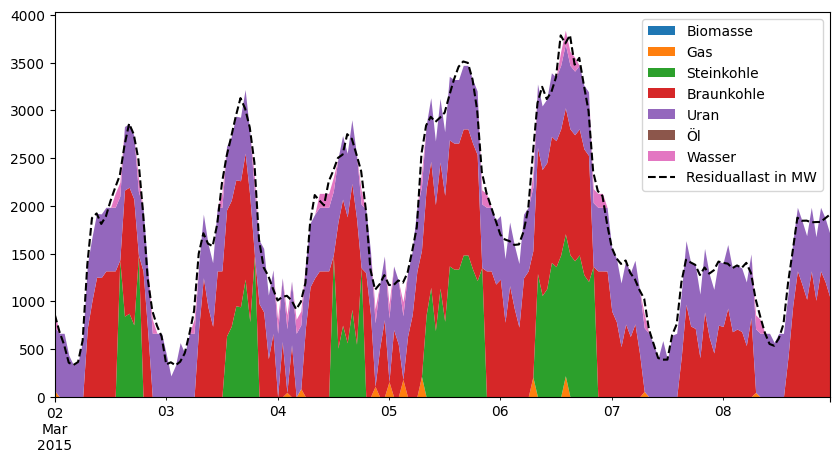

In [54]:
fig, ax = plt.subplots(figsize=(10,5))


### Ergebnisse: Speicher

In [55]:
# Save production to matrix
matrix= []

for t in T:
    array = []
    array.append(S_in[t].X)
    array.append(S_out[t].X)
    matrix.append(array)
    
# Convert matrix to Dataframe
Storage = pd.DataFrame(matrix)
# Rename columns
Storage.columns = ['S_in', 'S_out']
# Set index to timestamp
Storage.set_index(df_res_load_cropped.index, inplace=True)
# Convert S_in in negative values
Storage['S_in'] *= -1 #Storage['S_in']=Storage['S_in']*-1

Storage.tail()

,S_in,S_out
2015-03-08 19:00:00+00:00,-157.525,0.00
2015-03-08 20:00:00+00:00,-0.000,153.55
2015-03-08 21:00:00+00:00,-153.550,0.00
2015-03-08 22:00:00+00:00,-0.000,0.00
2015-03-08 23:00:00+00:00,-0.000,200.00


In [56]:
df_plot = pd.concat([Production, Storage], axis=1)
df_plot.head()

,Biomasse,Gas,Steinkohle,Braunkohle,Uran,Öl,Wasser,S_in,S_out
2015-03-02 00:00:00+00:00,0.0,62.725,0.0,0.0,666.000,0.0,146.0,-1.537500e+01,0.000
2015-03-02 01:00:00+00:00,0.0,0.000,0.0,0.0,666.000,0.0,0.0,-0.000000e+00,15.375
2015-03-02 02:00:00+00:00,0.0,0.000,0.0,0.0,666.000,0.0,0.0,-1.211500e+02,0.000
2015-03-02 03:00:00+00:00,0.0,0.000,0.0,0.0,436.875,0.0,0.0,-7.885000e+01,0.000
2015-03-02 04:00:00+00:00,0.0,0.000,0.0,0.0,334.075,0.0,0.0,-1.136868e-13,0.000


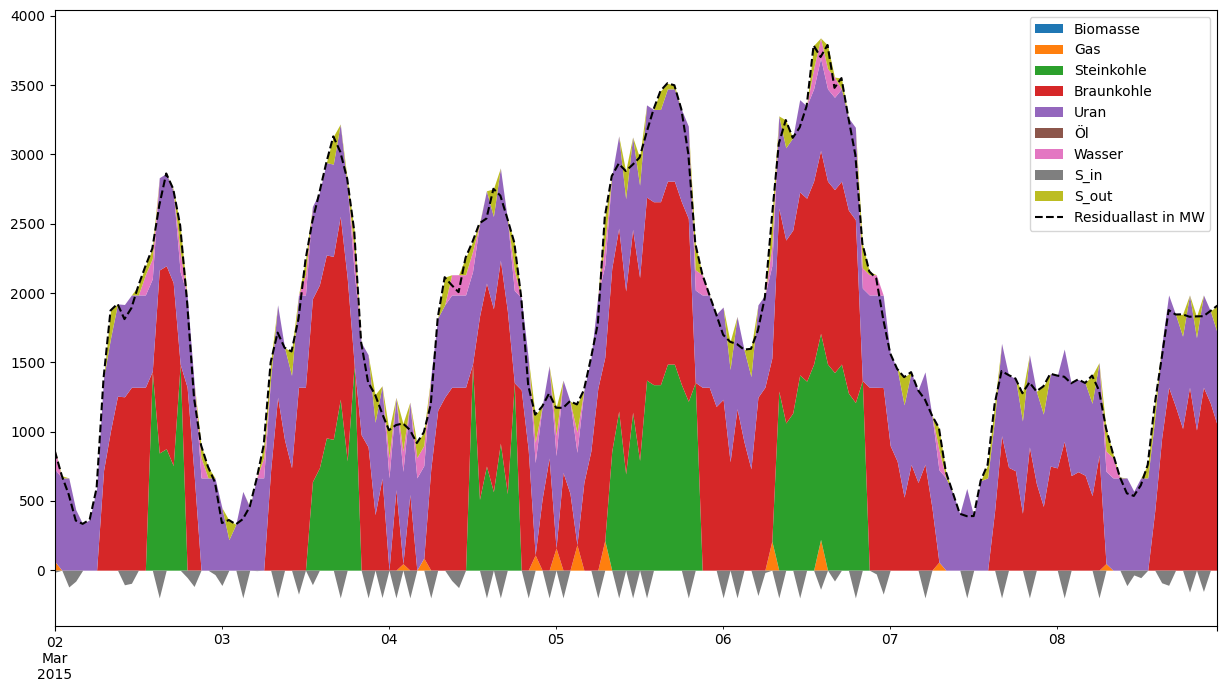

In [57]:
fig, ax = plt.subplots(figsize=(15,8))


### Ergebnisse: Emissionen

In [58]:
# Save production to matrix
matrix= []
for t in T:
    array = []
    for i in I:
        array.append(E[t,i].X)
    matrix.append(array)
# Convert matrix to Dataframe
Emissionen = pd.DataFrame(matrix)
# Rename columns
Emissionen.columns = ['Biomasse', 'Gas', 'Steinkohle', 'Braunkohle', 'Uran', 'Öl', 'Wasser']
# Set index to timestamp
Emissionen.set_index(df_res_load_cropped.index, inplace=True)

Emissionen.tail()

,Biomasse,Gas,Steinkohle,Braunkohle,Uran,Öl,Wasser
2015-03-08 19:00:00+00:00,0.0,0.0,0.0,1617000.000,0.0,0.0,0.0
2015-03-08 20:00:00+00:00,0.0,0.0,0.0,1239393.750,0.0,0.0,0.0
2015-03-08 21:00:00+00:00,0.0,0.0,0.0,1617000.000,0.0,0.0,0.0
2015-03-08 22:00:00+00:00,0.0,0.0,0.0,1474991.875,0.0,0.0,0.0
2015-03-08 23:00:00+00:00,0.0,0.0,0.0,1277858.750,0.0,0.0,0.0


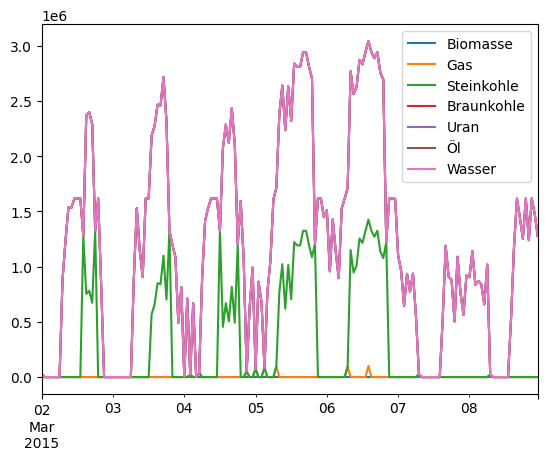

In [59]:
Emissionen.plot(stacked=True)
plt.show()